In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree

IMPORT ET CONCATÉNATION DES DATAFRAMES

In [2]:
df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'), 
                   ['2016_01.csv', '2016_02.csv', '2016_03.csv','2016_04.csv','2016_05.csv','2016_06.csv',
                    '2016_07.csv','2016_08.csv','2016_09.csv','2016_10.csv','2016_11.csv','2016_12.csv']))
df

/tmp/ipykernel_86584/1528132232.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_86584/1528132232.py:1: DtypeWarning: Columns (0,1,3,4,10,11,13,19,20,21,22,30,36,41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_86584/1528132232.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_86584/1528132232.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_86584/1528132232.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on imp

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460944,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460945,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460946,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460947,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5635978 entries, 0 to 460948
Data columns (total 65 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   object 
 1   QUARTER                object 
 2   MONTH                  int64  
 3   DAY_OF_MONTH           object 
 4   DAY_OF_WEEK            object 
 5   FL_DATE                object 
 6   UNIQUE_CARRIER         object 
 7   AIRLINE_ID             int64  
 8   CARRIER                object 
 9   TAIL_NUM               object 
 10  FL_NUM                 object 
 11  ORIGIN_AIRPORT_ID      object 
 12  ORIGIN_AIRPORT_SEQ_ID  int64  
 13  ORIGIN_CITY_MARKET_ID  object 
 14  ORIGIN                 object 
 15  ORIGIN_CITY_NAME       object 
 16  ORIGIN_STATE_ABR       object 
 17  ORIGIN_STATE_FIPS      float64
 18  ORIGIN_STATE_NM        object 
 19  ORIGIN_WAC             object 
 20  DEST_AIRPORT_ID        object 
 21  DEST_AIRPORT_SEQ_ID    object 
 22  DEST_CITY_MARKET_ID

EXLPORATION ET NETTOYAGE DE DONNÉE

In [4]:
avion = df.drop(['CANCELLATION_CODE', 'Unnamed: 64', 'FIRST_DEP_TIME', 'CANCELLED',
                 'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME', 'FLIGHTS', 'TAXI_IN'], axis=1)
avion

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,158.0,155.0,132.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,158.0,150.0,126.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,158.0,170.0,135.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,158.0,151.0,129.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,158.0,171.0,137.0,986.0,4.0,0.0,0.0,47.0,0.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460944,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,95.0,90.0,69.0,451.0,2.0,NaN,NaN,NaN,NaN,NaN
460945,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,95.0,99.0,73.0,451.0,2.0,NaN,NaN,NaN,NaN,NaN
460946,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,200.0,176.0,163.0,1440.0,6.0,NaN,NaN,NaN,NaN,NaN
460947,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,75.0,72.0,58.0,368.0,2.0,NaN,NaN,NaN,NaN,NaN


In [5]:
mois = avion[avion['MONTH'] == 20366].index[0]

jour = avion[avion['DAY_OF_MONTH'] == 'EV'].index[0]

sem = avion[avion['DAY_OF_WEEK'] == 'N707EV'].index[0]

car = avion[avion['CARRIER'] == '30397'].index[0]

des = avion[avion['DEST'] == '1800-1859'].index[0]

dest = avion[avion['DEST'] == '33'].index[0]

li = [mois, jour, sem, car, des, dest]
           
avion = avion.drop(li)

avion

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,158.0,155.0,132.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,158.0,150.0,126.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,158.0,170.0,135.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,158.0,151.0,129.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,158.0,171.0,137.0,986.0,4.0,0.0,0.0,47.0,0.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460944,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,95.0,90.0,69.0,451.0,2.0,NaN,NaN,NaN,NaN,NaN
460945,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,95.0,99.0,73.0,451.0,2.0,NaN,NaN,NaN,NaN,NaN
460946,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,200.0,176.0,163.0,1440.0,6.0,NaN,NaN,NaN,NaN,NaN
460947,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,75.0,72.0,58.0,368.0,2.0,NaN,NaN,NaN,NaN,NaN


In [6]:
avion['RETARD'] = avion['ARR_DELAY_NEW']
avion['RETARD'] = np.where(avion['RETARD'] <= 0, 0, 1)

avion['RETARD'].value_counts()

0    3665675
1    1970284
Name: RETARD, dtype: int64

In [7]:
avion['LATE'] = avion['RETARD']
avion['LATE'] = avion['LATE'].replace({0: 'À l\'heure', 1: 'En retard'}).astype(str)
avion['LATE']

0         À l'heure
1         À l'heure
2         En retard
3         À l'heure
4         En retard
            ...    
460944    À l'heure
460945    En retard
460946    À l'heure
460947    À l'heure
460948    À l'heure
Name: LATE, Length: 5635959, dtype: object

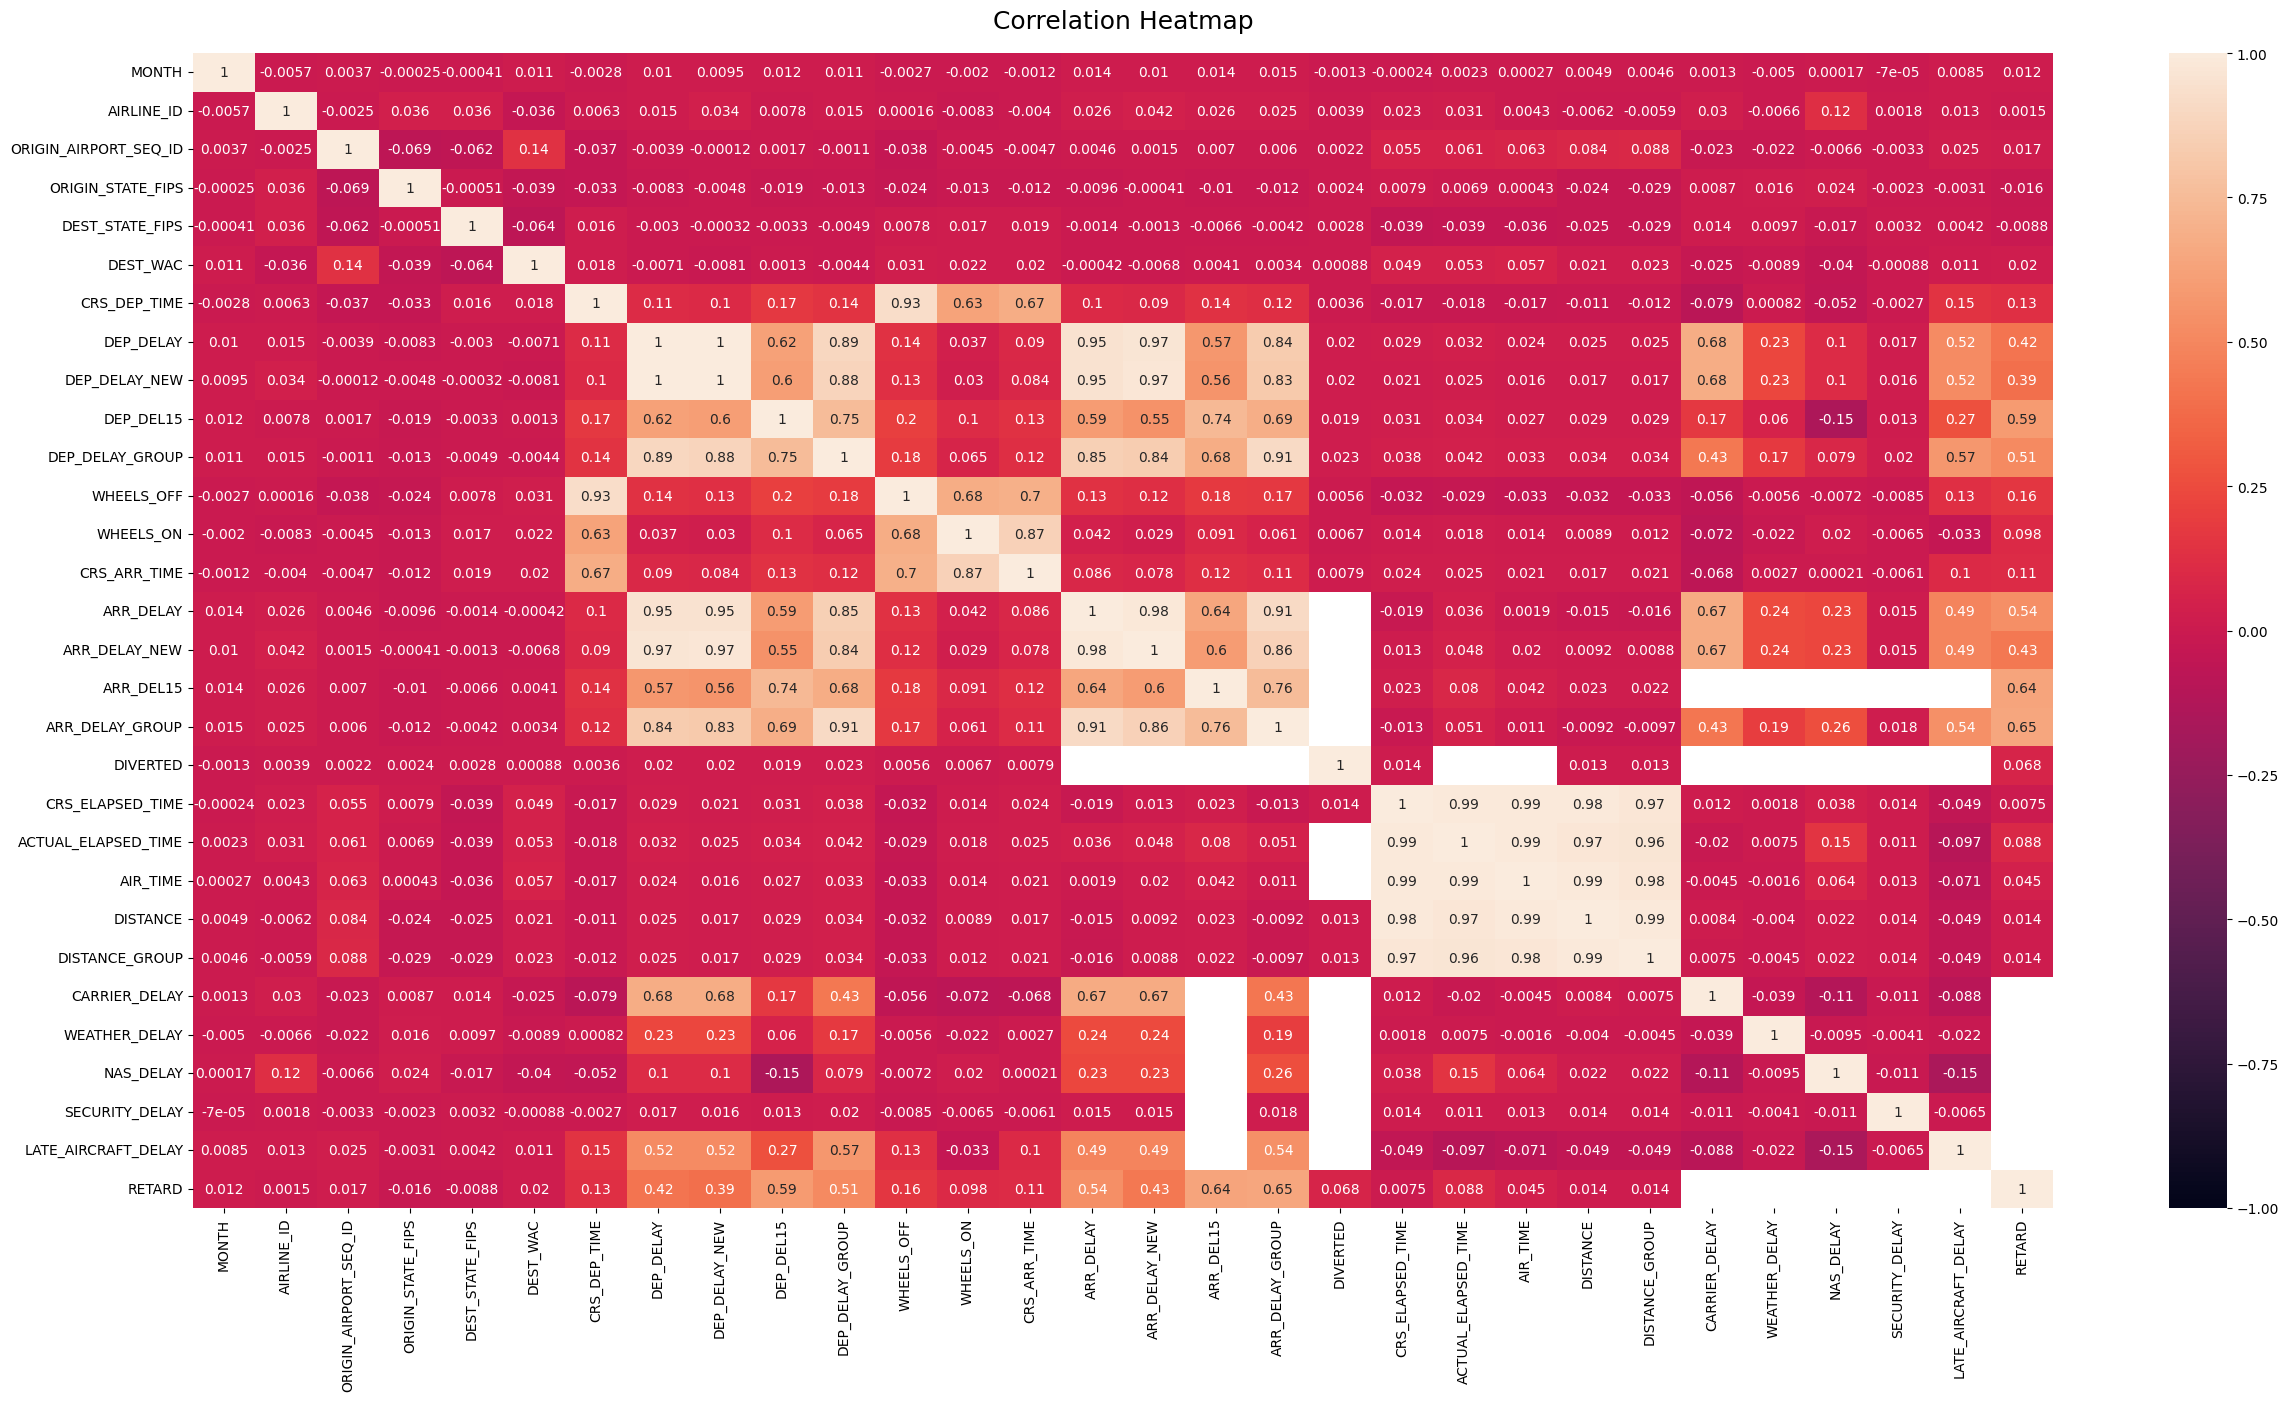

In [8]:
plt.figure(figsize=(30, 15))

heatmap = sns.heatmap(avion.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=18);

In [9]:
avion_cl = avion[['CARRIER', 'ORIGIN', 'DEST',
               'RETARD','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ARR_TIME', 'DISTANCE']]

cat_cols = ['CARRIER', 'ORIGIN', 'DEST']

avion_cl.sort_values(by='DISTANCE')

,CARRIER,ORIGIN,DEST,RETARD,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_TIME,DISTANCE
284259,OO,GRB,ATW,1,11,28,1,1145.0,NaN,25.0
217837,EV,EFD,IAH,1,8,14,7,1850.0,2016.0,28.0
32383,OO,SFO,SJC,1,2,17,3,1650.0,1747.0,30.0
213736,AS,PSG,WRG,1,7,23,6,1621.0,1652.0,31.0
310661,AS,PSG,WRG,0,10,1,6,1523.0,1523.0,31.0
...,...,...,...,...,...,...,...,...,...,...
253680,HA,JFK,HNL,0,8,2,2,1000.0,1434.0,4983.0
131129,HA,HNL,JFK,1,9,17,6,1510.0,742.0,4983.0
385885,AA,DFW,LAS,1,4,22,5,1705.0,NaN,NaN
454115,B6,4.00,NaN,1,4,29,5,127.0,NaN,NaN


UNDERSAMPLING 

In [10]:
nb_rt = len(avion_cl[avion_cl['RETARD'] == 1])
und_sam = avion_cl[avion_cl['RETARD'] == 0].head(nb_rt)
samp = avion_cl.sort_values(by='RETARD').tail(nb_rt)
und_avion = pd.concat([und_sam, samp])

und_avion = und_avion.dropna().sample(210000)
und_avion['RETARD'].value_counts()

0    106923
1    103077
Name: RETARD, dtype: int64

PREPROCESSING

In [11]:
#enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
#avion_encoded = enc.fit_transform(und_avion[cat_cols])
avion_encoded = pd.get_dummies(und_avion, columns=cat_cols)
avion_encoded = avion_encoded.replace({True: 1, False: 0})
avion_encoded

,RETARD,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_TIME,DISTANCE,CARRIER_AA,CARRIER_AS,CARRIER_B6,...,DEST_TYR,DEST_TYS,DEST_UST,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_YAK,DEST_YUM
360769,0,6,4,6,130.0,513.0,1608.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151886,0,4,9,6,1610.0,1739.0,883.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123529,1,12,8,4,800.0,1015.0,1488.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24658,1,4,13,3,1635.0,2102.0,834.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23760,0,4,12,2,2210.0,2149.0,134.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105326,1,12,19,1,945.0,1601.0,1162.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
314334,1,5,25,3,1423.0,1625.0,563.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16527,0,7,27,3,2200.0,2259.0,272.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47444,0,1,8,5,1000.0,1109.0,214.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


TEST DU MODEL LOGISTIC REGRESSION

In [12]:
X = avion_encoded.drop('RETARD', axis=1)
y = avion_encoded[['RETARD']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LogisticRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

/home/ryan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.686936507936508

In [13]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [14]:
report =  classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70     32109
           1       0.69      0.66      0.67     30891

    accuracy                           0.69     63000
   macro avg       0.69      0.69      0.69     63000
weighted avg       0.69      0.69      0.69     63000



STANDARDISATION DES DONNÉES

In [15]:
feature = X.columns.tolist()

av_stand = avion_encoded
scaler = MinMaxScaler()
av_stand[feature] = scaler.fit_transform(av_stand[feature])
av_stand

,RETARD,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_TIME,DISTANCE,CARRIER_AA,CARRIER_AS,CARRIER_B6,...,DEST_TYR,DEST_TYS,DEST_UST,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_YAK,DEST_YUM
360769,0,0.454545,0.100000,0.833333,0.054707,0.213422,0.318457,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151886,0,0.272727,0.266667,0.833333,0.682358,0.724469,0.172052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123529,1,1.000000,0.233333,0.500000,0.338846,0.422676,0.294225,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24658,1,0.272727,0.400000,0.333333,0.692960,0.875782,0.162157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23760,0,0.272727,0.366667,0.166667,0.936811,0.895373,0.020800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105326,1,1.000000,0.600000,0.000000,0.400339,0.666945,0.228393,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314334,1,0.363636,0.800000,0.333333,0.603053,0.676949,0.107431,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16527,0,0.545455,0.866667,0.333333,0.932570,0.941226,0.048667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47444,0,0.000000,0.233333,0.666667,0.423664,0.461859,0.036955,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CHOIX DU MODEL DECISION TREE APRES DIFFERENT TEST DE MODEL

In [16]:
X = av_stand.drop('RETARD', axis=1)
y = av_stand[['RETARD']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

report =  classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     32109
           1       0.81      0.80      0.80     30891

    accuracy                           0.81     63000
   macro avg       0.81      0.81      0.81     63000
weighted avg       0.81      0.81      0.81     63000



USAGE DE GRID SEARCH POUR TROUVER LES MEILLEURS PARAMETRES

In [17]:
def dtree_grid_search(X,y,nfolds):
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

    dtree_model=DecisionTreeClassifier()

    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)

    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

#dtree_grid_search(X,y,5)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

dtc = DecisionTreeClassifier(criterion='gini', max_depth= 14)

dtc = dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

report =  classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.89      0.81     32109
           1       0.86      0.68      0.76     30891

    accuracy                           0.79     63000
   macro avg       0.80      0.79      0.79     63000
weighted avg       0.80      0.79      0.79     63000



MATRICE DE CONFUSION 

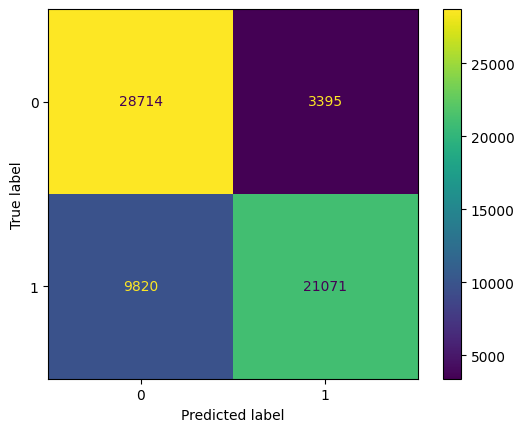

In [19]:
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

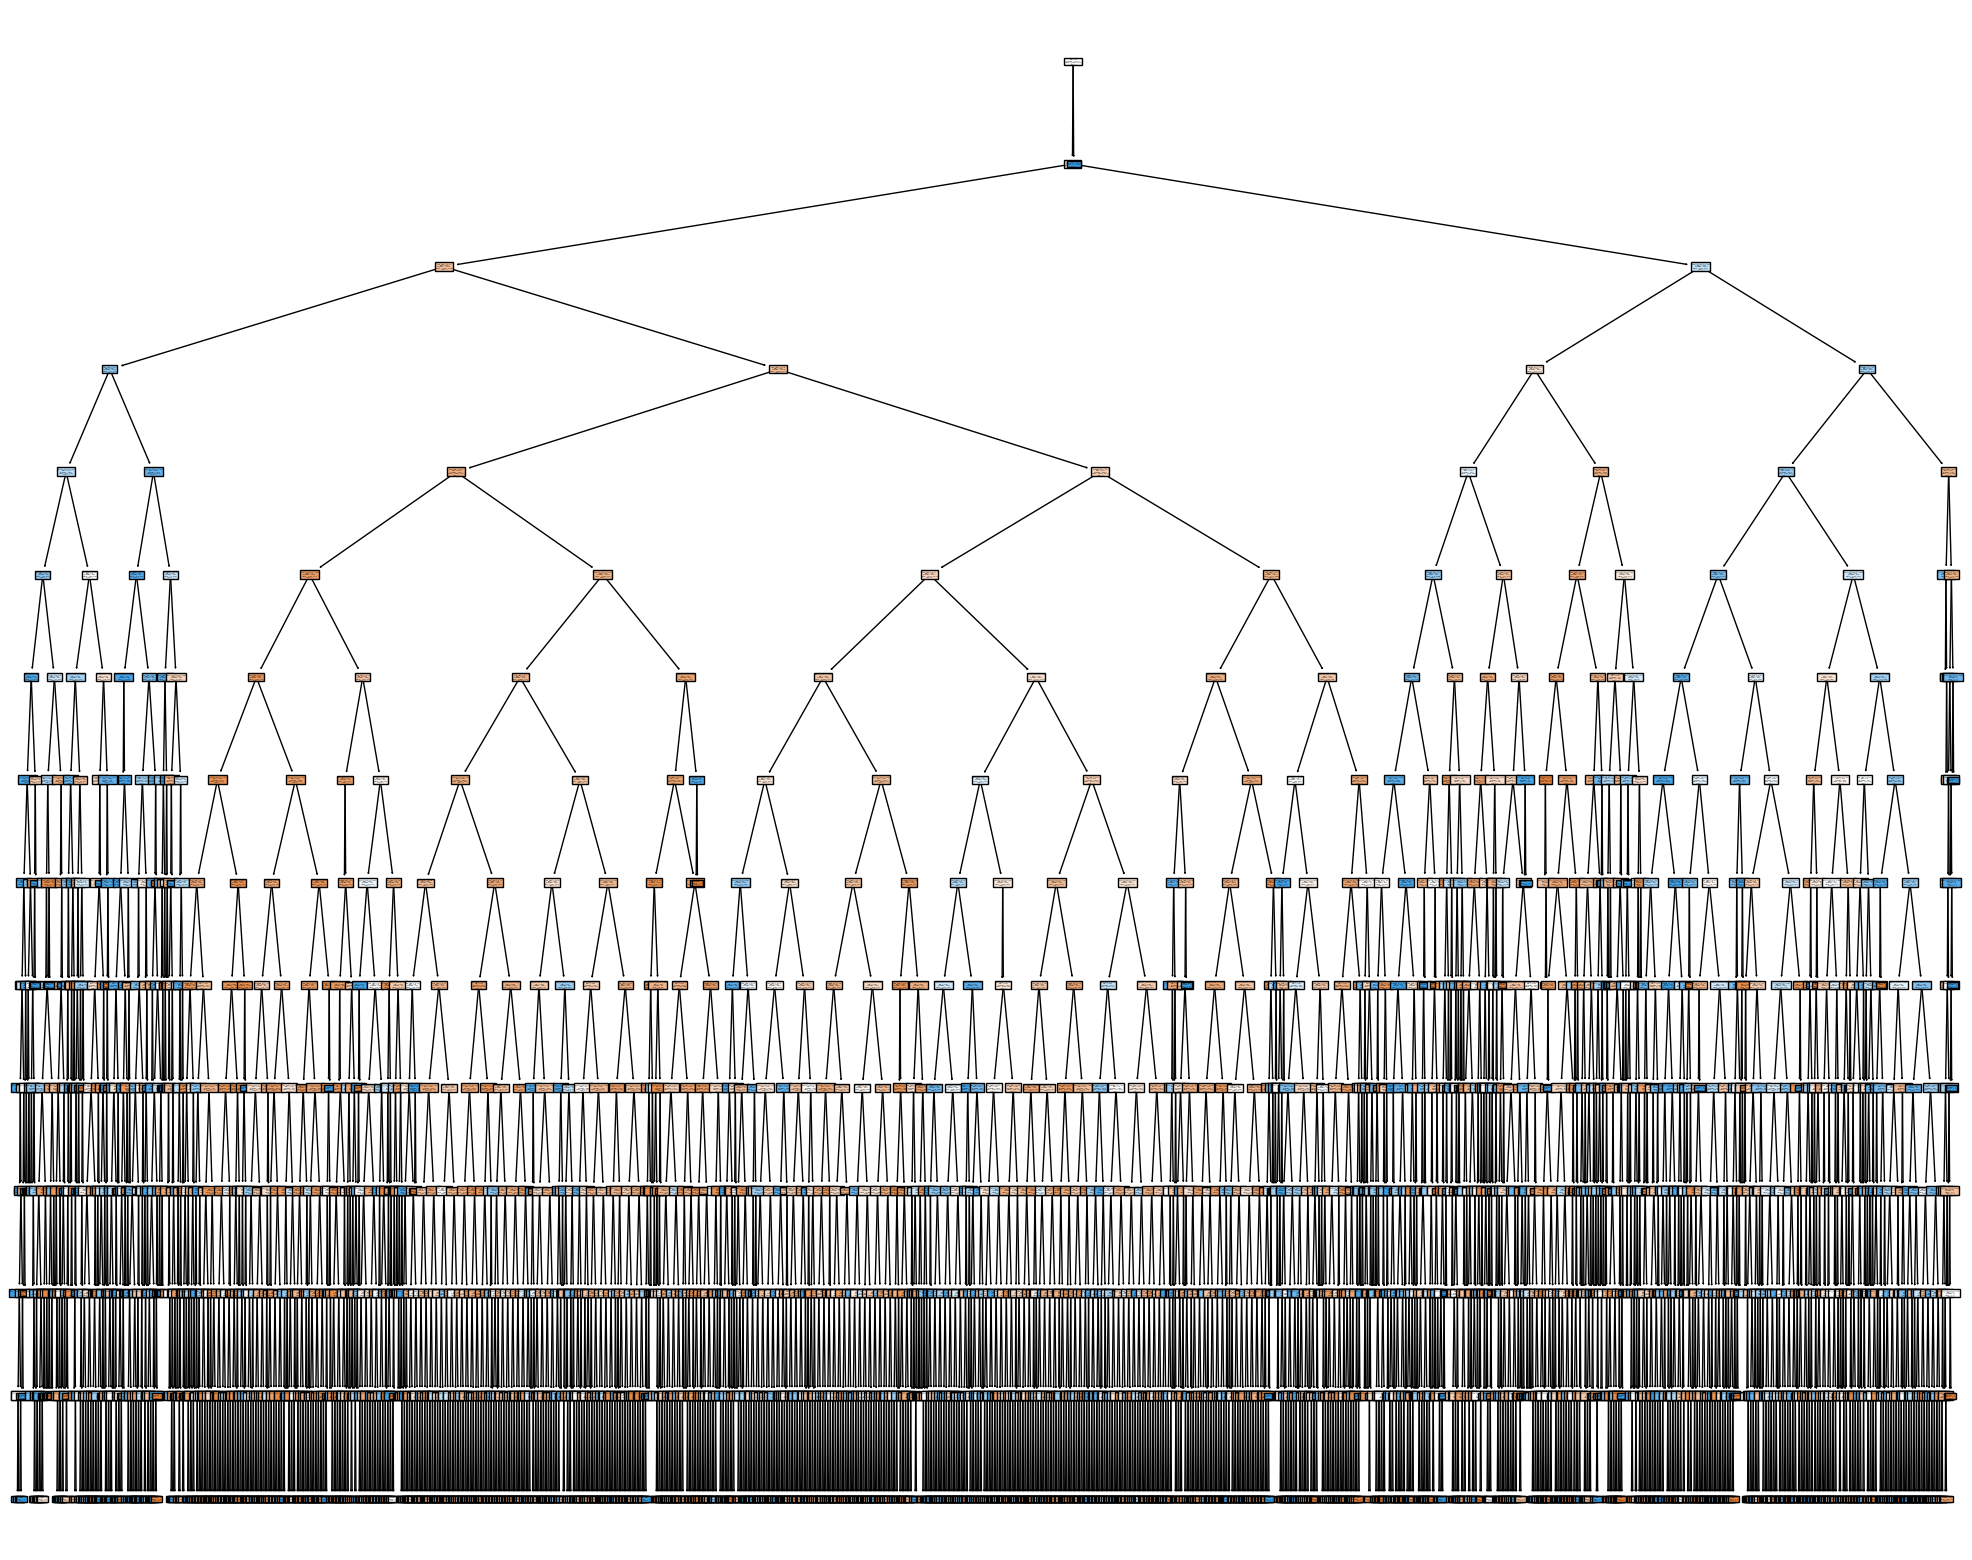

In [20]:
feature = list(X.columns)
target = ['0', '1']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc,
               feature_names = feature, 
               class_names=target,
               filled = True)

PREPROCESSING POUR LA REGRESSION

In [21]:
avion_reg = avion[['ARR_DELAY_NEW','CARRIER', 'ORIGIN', 'DEST',
               'RETARD','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ARR_TIME', 'DISTANCE']]

avion_reg = avion_reg.dropna()
avion_reg

,ARR_DELAY_NEW,CARRIER,ORIGIN,DEST,RETARD,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_TIME,DISTANCE
0,0.0,AA,DFW,DTW,0,1,6,3,1100.0,1432.0,986.0
1,0.0,AA,DFW,DTW,0,1,7,4,1100.0,1426.0,986.0
2,7.0,AA,DFW,DTW,1,1,8,5,1100.0,1445.0,986.0
3,0.0,AA,DFW,DTW,0,1,9,6,1100.0,1433.0,986.0
4,113.0,AA,DFW,DTW,1,1,10,7,1100.0,1631.0,986.0
...,...,...,...,...,...,...,...,...,...,...,...
460944,0.0,WN,TUS,LAX,0,12,31,6,755.0,817.0,451.0
460945,9.0,WN,TUS,LAX,1,12,31,6,1320.0,1404.0,451.0
460946,0.0,WN,TUS,MDW,0,12,31,6,705.0,1055.0,1440.0
460947,0.0,WN,TUS,SAN,0,12,31,6,1220.0,1231.0,368.0


In [22]:
nb_rt = len(avion_reg[avion_reg['RETARD'] == 1])
und_sam = avion_reg[avion_reg['RETARD'] == 0].head(nb_rt)
samp = avion_reg.sort_values(by='RETARD').tail(nb_rt)
und_avion = pd.concat([und_sam, samp])

und_avion = und_avion.dropna().sample(500000)
und_avion['RETARD'].value_counts()

1    250089
0    249911
Name: RETARD, dtype: int64

In [23]:
avion_encoded = pd.get_dummies(und_avion, columns=cat_cols)
avion_encoded_reg = avion_encoded.replace({True: 1, False: 0})
feature = avion_encoded_reg.drop('ARR_DELAY_NEW', axis=1).columns.tolist()


#av_stand_reg = avion_encoded
#scaler = MinMaxScaler()
#av_stand_reg[feature] = scaler.fit_transform(av_stand_reg[feature])

#scaler = StandardScaler()
#av_stand_reg = scaler.fit_transform(avion_encoded_reg[feature])

avion_encoded_reg

,ARR_DELAY_NEW,RETARD,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_TIME,DISTANCE,CARRIER_AA,CARRIER_AS,...,DEST_TYR,DEST_TYS,DEST_UST,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_YAK,DEST_YUM
207553,1.0,1,5,23,1,1210.0,1346.0,957.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0.0,0,3,4,5,2206.0,529.0,2688.0,0,0,...,0,0,0,0,0,0,0,0,0,0
27721,0.0,0,2,24,3,1140.0,1345.0,748.0,0,0,...,0,0,0,0,0,0,0,0,0,0
80447,761.0,1,8,3,3,1827.0,1223.0,1235.0,1,0,...,0,0,0,0,0,0,0,0,0,0
240785,0.0,0,5,14,6,1600.0,1904.0,794.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99195,0.0,0,3,24,4,1945.0,2055.0,310.0,0,0,...,0,0,0,0,0,0,0,0,0,0
55710,0.0,0,4,25,1,828.0,952,502.0,0,0,...,0,0,0,0,0,0,0,0,0,0
441341,54.0,1,3,11,5,2025.0,2301.0,550.0,0,1,...,0,0,0,0,0,0,0,0,0,0
33913,0.0,0,7,9,6,730.0,858.0,1986.0,0,0,...,0,0,0,0,0,0,0,0,0,0


TEST DU MODEL LINEAR REGRESSION

In [24]:
X = avion_encoded_reg.drop('ARR_DELAY_NEW', axis=1)
y = avion_encoded_reg[['ARR_DELAY_NEW']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

reg = LinearRegression()

reg = reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
 
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 18.740695790468852
Mean Squared Error (MSE): 1848.194520443375
R-squared (R²): 0.15604440242559037
Root Mean Squared Error (RMSE): 42.99063293838991
